In [135]:
import bmxdata
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy import signal
from numpy.fft import rfft

In [58]:
directory = '/astro/u/anze/bmxdata/raw/2010/'
## filelist
flist = glob.glob(directory+"/*_D1.data")


In [61]:
## terminated input is WY, so channel 4 in D1. For voltages we need to have a look at D2 files
## SY also seems relatively clean
termchan = np.vstack([bmxdata.BMXFile(fn).data['chan4_0'] for fn in flist])
D2data = [bmxdata.BMXFile(fn.replace('D1','D2')) for fn in flist]
sychan =  np.vstack([d.data['chan3_0'] for d in D2data])
volt = np.hstack([d.data['lj_voltage'] for d in D2data])
ljstate = np.hstack([d.data['lj_diode'] for d in D2data])

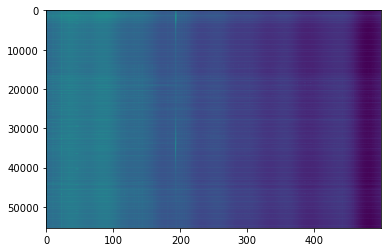

In [66]:
plt.imshow(np.log10(sychan)[:,1000:1500],aspect='auto')

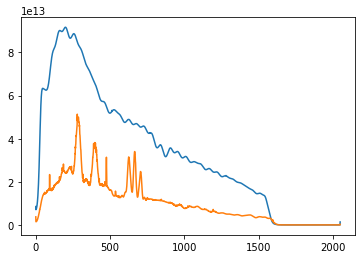

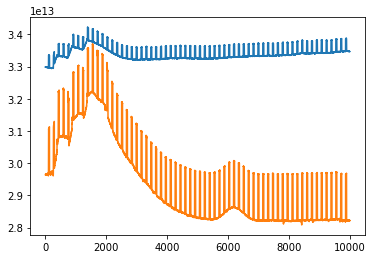

In [76]:
plt.figure()
plt.plot(termchan.mean(axis=0))
plt.plot(sychan.mean(axis=0))
plt.figure()
plt.plot(termchan.mean(axis=1)[:10000])
plt.plot(sychan[:,1000:1500].mean(axis=1)[:10000]*5)

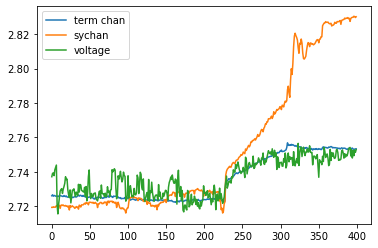

In [74]:

## let us just cut out diode pulses
termclean = (termchan.mean(axis=1)[ljstate==0])/1.21e13
voltclean = (volt[ljstate==0])
syclean = (sychan[:,1000:1500].mean(axis=1)[ljstate==0])/2.18e12
plt.plot(termclean[0:400],label='term chan')
plt.plot(syclean[0:400],label='sychan')
plt.plot(voltclean[0:400],label='voltage')
plt.legend()

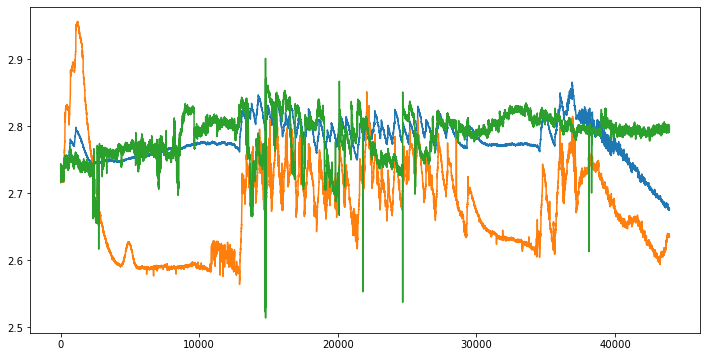

In [97]:
plt.figure(figsize=(12,6))
plt.plot(termclean)
plt.plot(syclean)
plt.plot(voltclean)

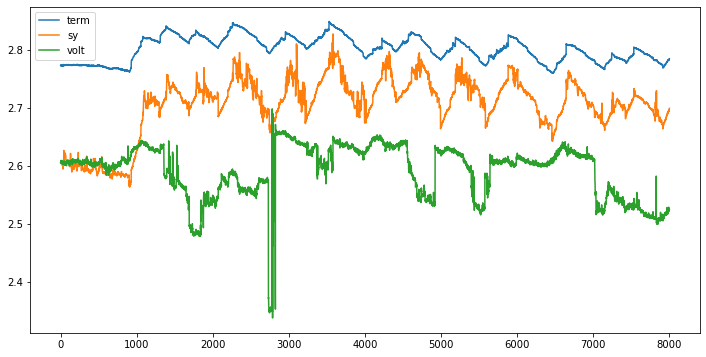

In [129]:
plt.figure(figsize=(12,6))
plt.plot(termclean[12000:20000],label='term')
plt.plot(syclean[12000:20000],label='sy')
plt.plot(voltclean[12000:20000]*0.93,label='volt')
plt.legend()

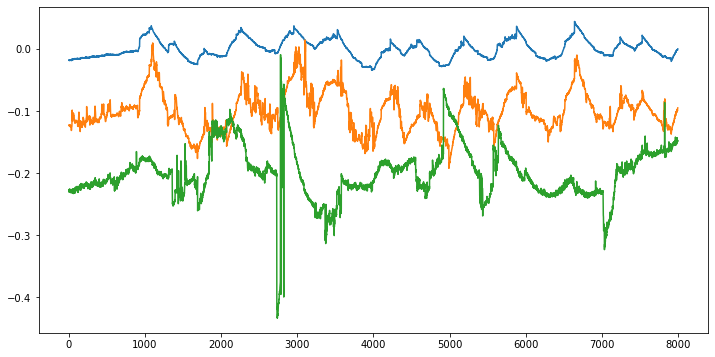

In [134]:
plt.figure(figsize=(12,6))
sos = signal.butter(6,0.0005, 'hp',output='sos')
plt.plot(signal.sosfilt(sos, termclean)[12000:20000])
plt.plot(signal.sosfilt(sos, syclean)[12000:20000]-0.1)
plt.plot(signal.sosfilt(sos, voltclean)[12000:20000]-0.2)
#plt.plot(signal.sosfilt(sos, voltclean)[12000:20000])

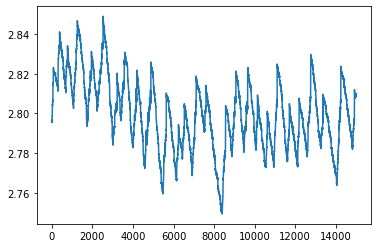

In [157]:
Ns=13000
Ne=28000
plt.plot(termclean[Ns:Ne])

[]

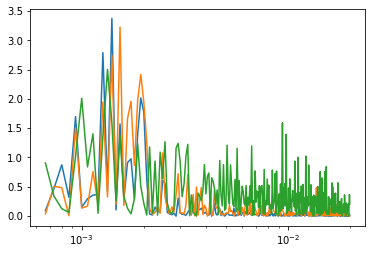

In [162]:
Fs=10
Fe=300
ff=np.fft.rfftfreq(len(termclean[Ns:Ne]))
plt.plot(ff[Fs:Fe],abs(ff*rfft(termclean[Ns:Ne])**2)[Fs:Fe])
plt.plot(ff[Fs:Fe],abs(ff*rfft(syclean[Ns:Ne])**2)[Fs:Fe]*0.3)
plt.plot(ff[Fs:Fe],abs(ff*rfft(voltclean[Ns:Ne])**2)[Fs:Fe]*0.3)
plt.semilogx()